### Importation of packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import (
precision_score,
accuracy_score,
recall_score,
f1_score)
from sklearn.metrics import confusion_matrix, classification_report

# import warning filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Load the dataset

fd = pd.read_csv("Loan_Modelling.csv")

## EXPLORATORY DATA ANALYSIS

In [3]:
# Explore the dataset

fd.sample(5)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4320,4321,40,15,143,94801,1,4.1,1,0,0,0,0,1,0
4614,4615,56,30,15,92093,4,0.7,3,102,0,0,0,0,0
2003,2004,44,20,124,90277,1,4.7,1,0,0,0,0,1,1
3893,3894,30,5,40,92521,4,1.7,2,0,0,0,0,1,0
2260,2261,39,14,15,93561,2,0.3,2,92,0,0,0,0,0


In [4]:
# To check columns and rows of the data frame

fd.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
fd.describe().sum()

ID                     21446.520003
Age                     5281.801566
Experience              5131.572554
Income                  5552.807929
ZIPCode               566540.712086
Family                  5014.544063
CCAvg                   5018.385597
Education               5012.720869
Mortgage                5894.212602
Personal_Loan           5001.390621
Securities_Account      5001.410209
CD_Account              5001.298650
Online                  5004.087389
CreditCard              5002.749637
dtype: float64

In [6]:
# check for duplicates

fd.duplicated().sum()

0

In [7]:
# check the dimension of datab set

fd.shape

(5000, 14)

In [8]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [9]:
# check for missing values

fd.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [10]:
# display some descriptive statistics of data

fd.describe()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93169.257000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,1759.455086,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


### DATA VISUALIZATION

### Univariate Analysis: Categorical Features

In [16]:
from Utily import labeled_barplot

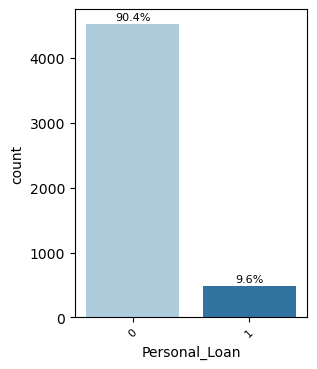

In [17]:
labeled_barplot(data=fd, feature = "Personal_Loan", perc = True)

In [18]:
fd["Personal_Loan"].value_counts(normalize=True)

0    0.904
1    0.096
Name: Personal_Loan, dtype: float64

### From the graph above

- 0 means those liability customers that will not buy the Personal_Loan, it shows that 90.4% of the customers

- 1- means those liability customers that will buy the Personal_Loan, and it shows 9.6% of the customers.


- Hence, We can conclude that the data is imbalance data

In [19]:
# Check for Correlation

fd.corr()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.002240,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.030530,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.030456,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.030709,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIPCode,0.002240,-0.030530,-0.030456,-0.030709,1.000000,0.027512,-0.012188,-0.008266,0.003614,-0.002974,0.002422,0.021671,0.028317,0.024033
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.027512,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.012188,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.008266,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.003614,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal_Loan,-0.024801,-0.007726,-0.007413,0.502462,-0.002974,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


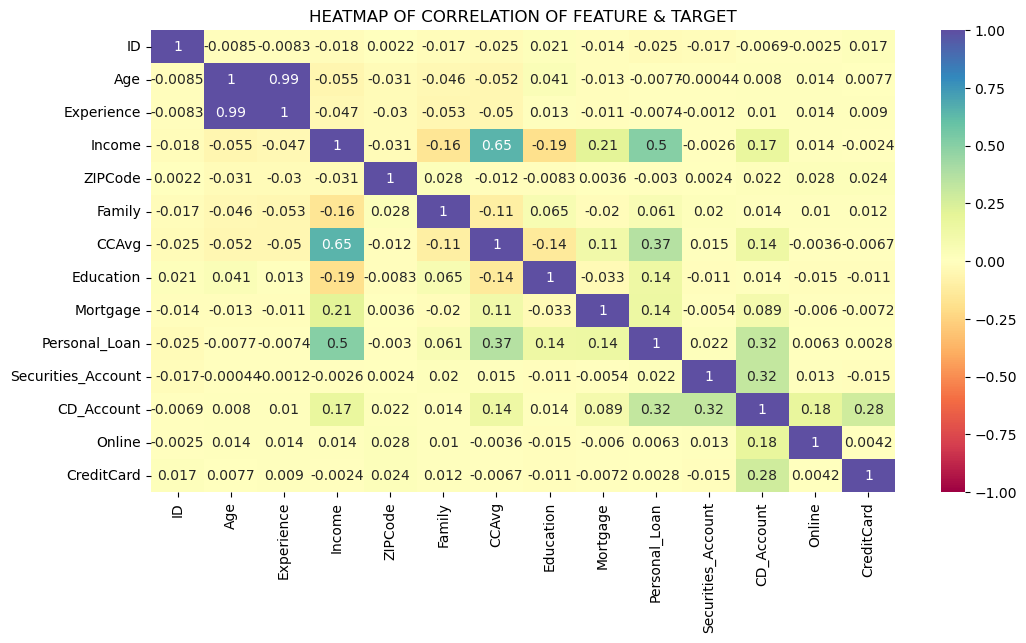

In [20]:
# By using HeatMap

mat_cor = fd.corr()
plt.figure(figsize = (12, 6))
sns.heatmap(mat_cor, annot = True, vmin = -1, vmax = 1, cmap = "Spectral")
plt.title("HEATMAP OF CORRELATION OF FEATURE & TARGET");

From the heatmap only three variables can be have correlations with the Personal_Loan, namely: Income, CCAvg and CD_Account

Based on the heatmap analysis, it indicates that the variables "Income," "CCAvg," and "CD_Account" have correlations with
the "Personal_Loan" variable. Here's an explanation of each variable and its potential relationship with the likelihood of 
a customer accepting a personal loan:
    
    
Income:    The "Income" variable represents the annual income of the customer. Typically, higher incomes may indicate a 
greater capacity for borrowing and repaying loans. Customers with higher incomes may have more disposable income, making
them more likely to consider and qualify for a personal loan. Therefore, it is reasonable to assume that customers with
higher incomes may have a positive correlation with accepting a personal loan.


CCAvg: The "CCAvg" variable represents the average spending on credit cards per month. Customers who have higher average 
monthly credit card spending may indicate a higher comfort level with credit and borrowing. Such customers may already 
be accustomed to managing credit and may be more likely to consider taking on additional credit in the form of a 
personal loan. Hence, there could be a positive correlation between higher credit card spending and accepting a personal
loan.


CD_Account: The "CD_Account" variable indicates whether the customer has a certificate of deposit (CD) account with the 
bank. A CD is a financial product where customers deposit a fixed amount of money for a specified period, usually at 
a higher interest rate than regular savings accounts. Customers who already have a CD account may be more financially 
aware and inclined to explore various banking products, including personal loans. Hence, the presence of a CD account 
may suggest a positive correlation with accepting a personal loan.

In [21]:
def custom_scatterplot(x, y, title, data=fd):
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=x, y=y, data=fd)
    plt.title(title)
    plt.show()

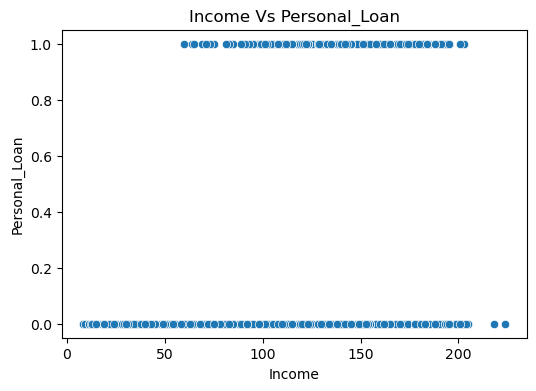

In [22]:
custom_scatterplot(x="Income", y="Personal_Loan", title="Income Vs Personal_Loan")

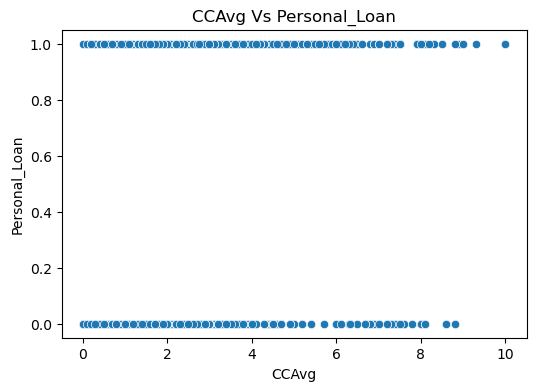

In [23]:
custom_scatterplot(x="CCAvg", y="Personal_Loan", title="CCAvg Vs Personal_Loan")

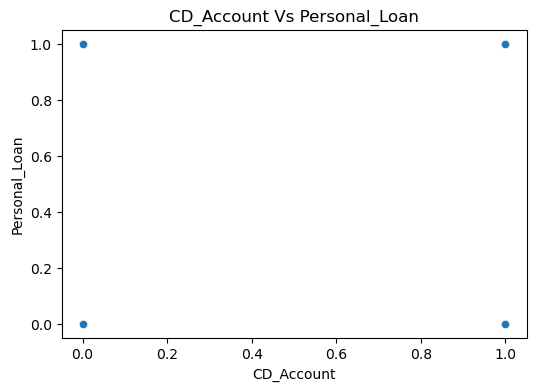

In [24]:
custom_scatterplot(x="CD_Account", y="Personal_Loan", title="CD_Account Vs Personal_Loan")

### Feature Selections

In [25]:
# let select our features and Target

x = fd.drop("Personal_Loan", axis =1)

y = fd["Personal_Loan"]

### Splitting the Data

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify = y)

In [27]:
# let check the split data

y_train.value_counts(normalize=True)

0    0.904
1    0.096
Name: Personal_Loan, dtype: float64

In [28]:
y_test.value_counts(normalize=True)

0    0.904
1    0.096
Name: Personal_Loan, dtype: float64

## (A) LOGISTIC REGRESSION

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
# To Normalize the data

scaler = StandardScaler()

x_train_sd = scaler.fit_transform(x_train)
x_test_sd = scaler.transform(x_test)

### Building the Model

In [31]:
# To build my Mode

from sklearn.linear_model import LogisticRegression

In [32]:
log_reg = LogisticRegression(random_state=0)

log_reg.fit(x_train_sd, y_train)

LogisticRegression(random_state=0)

In [33]:
log_reg.score(x_train_sd, y_train)

0.95275

### Checking the Performance of Model

In [34]:
from sklearn.metrics import (accuracy_score, recall_score, precision_score, f1_score, confusion_matrix)

In [35]:
from Utily import model_performance_classification

### Confusion Matrix

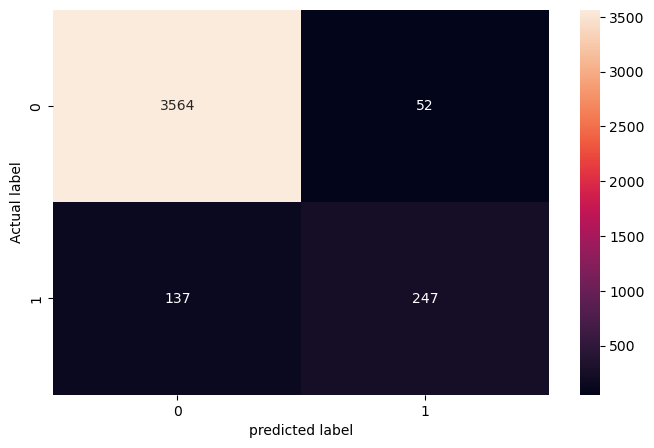

,Accuracy,Recall,Precision,F1_score
0,0.95275,0.643229,0.826087,0.72328


In [36]:
log_reg_train = model_performance_classification(log_reg, x_train_sd, y_train)
log_reg_train

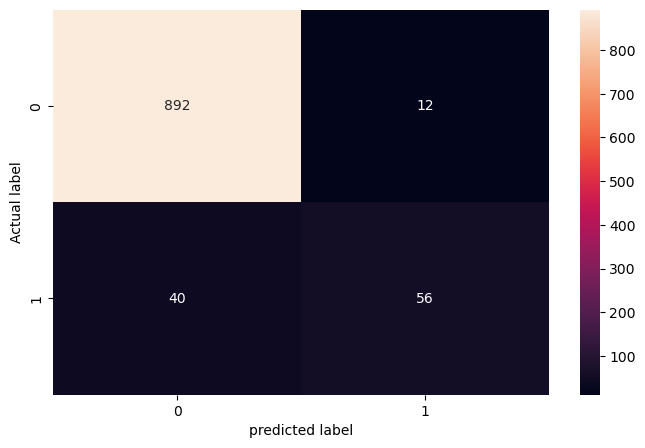

,Accuracy,Recall,Precision,F1_score
0,0.948,0.583333,0.823529,0.682927


In [37]:
log_reg_test = model_performance_classification(log_reg, x_test_sd, y_test)
log_reg_test

- Findings & Interpretations

- From the above model, the model achieved an accuracy of 0.9515 on the training set and 
an accuracy of 0.948 on the test set. The training accuracy is slightly higher than the test accuracy,
but the difference is relatively small. This suggests that the model is generalizing well and not suffering
from significant overfitting or underfitting.


- Additionally, looking at the other evaluation metrics, such as recall, precision, and F1-score, 
we can see that the values are relatively consistent between the training and test sets. 
This further supports the idea that the model is generalizing well.



## Model Improvement- Balancing dataset

In [38]:
from imblearn.over_sampling import SMOTE

In [39]:
smote = SMOTE(random_state=0)

x_sm, y_sm = smote.fit_resample(x, y)

In [40]:
from collections import Counter

In [41]:
Counter(y_sm)

Counter({0: 4520, 1: 4520})

In [42]:
# Split the dataset

x_train_sm, x_test_sm, y_train_sm, y_test_sm = train_test_split(x_sm, y_sm, test_size=0.2, random_state=0)

In [44]:
# Build the Model

log_reg2 = LogisticRegression(random_state=0)

log_reg2.fit(x_train_sm, y_train_sm)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

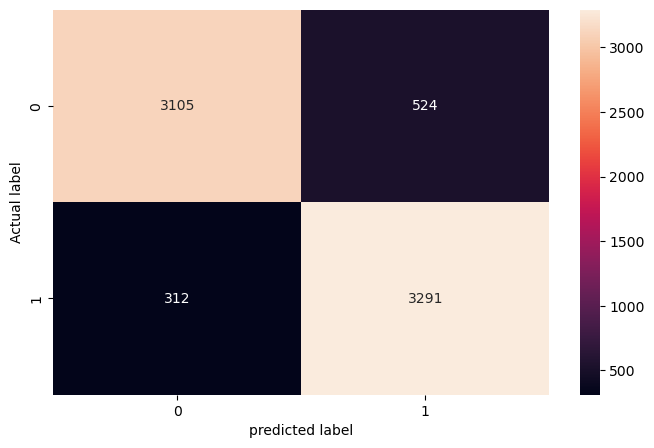

,Accuracy,Recall,Precision,F1_score
0,0.884403,0.913405,0.862647,0.887301


In [45]:
log_reg2_train = model_performance_classification(log_reg2, x_train_sm, y_train_sm)
log_reg2_train

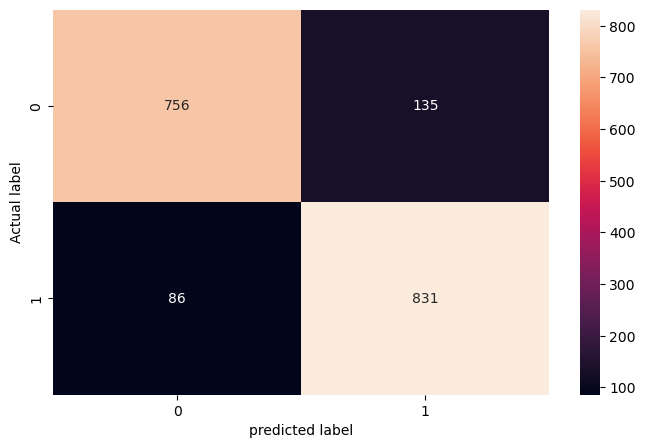

,Accuracy,Recall,Precision,F1_score
0,0.877765,0.906216,0.860248,0.882634


In [46]:
log_reg2_test = model_performance_classification(log_reg2, x_test_sm, y_test_sm)
log_reg2_test

- From the above results, it appears that applying the SMOTE (Synthetic Minority Over-sampling Technique) 
algorithm to balance the data has improved the performance of the logistic regression model. 
Here's the interpretation of the results:


- Accuracy: The accuracy measures the overall correctness of the model's predictions. The training set accuracy is 0.884403,
    which means that the model correctly predicts 88.44% of the instances in the training set. 
    Similarly, the test set accuracy is 0.877765, indicating that the model correctly predicts 87.78% of the instances 
    in the test set.

    
- Recall (Sensitivity): The recall, also known as sensitivity or true positive rate, measures the proportion of correctly 
    predicted positive instances (true positives) out of all actual positive instances. The training set recall is 0.913405, 
    suggesting that the model correctly identifies 91.34% of the positive instances in the training set. 
    The test set recall is 0.906216, indicating that the model correctly identifies 90.62% of the positive instances 
    in the test set.
    
    
- Overall, the results demonstrate that the logistic regression model, with the assistance of SMOTE to balance the data, 
has achieved relatively good performance. The accuracy, recall, precision, and F1-score values for both the training and 
test sets are relatively high, suggesting that the model is effectively predicting positive instances while minimizing 
false positives and false negatives.

## (B) DECISION TREE

### Implementation in Scikit-Learn

In [47]:
dec_tree = DecisionTreeClassifier(random_state=0)

dec_tree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

### Model Performance Check

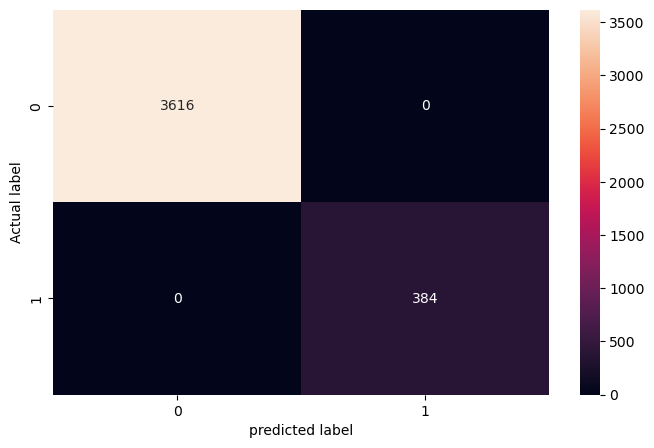

,Accuracy,Recall,Precision,F1_score
0,1.0,1.0,1.0,1.0


In [49]:
dec_tree_train = model_performance_classification(dec_tree, x_train, y_train)
dec_tree_train

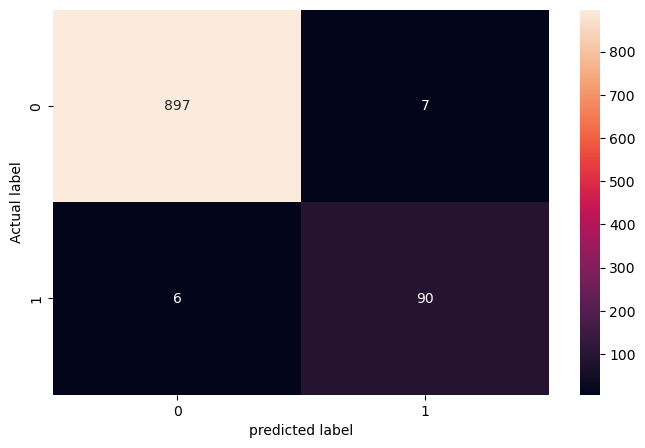

,Accuracy,Recall,Precision,F1_score
0,0.987,0.9375,0.927835,0.932642


In [50]:
dec_tree_test = model_performance_classification(dec_tree, x_test, y_test)
dec_tree_test

### Interpretation of results

Based on the above results of decision tree model, we could say that the decision tree model performs very well on both 
the training and testing sets. Let's interpret the results for each set:


Training Set:
    
    
Accuracy: The accuracy of 1.0 indicates that the model correctly predicted all the samples in the training set. 
    It achieved a perfect classification on the training data.
    

Recall: The recall of 1.0 suggests that the model identified all the positive samples correctly (no false negatives) 
    in the training set.

    
Precision: The precision of 1.0 indicates that all the positive predictions made by the model in the training set were
    correct (no false positives).

    
F1-Score: The F1-score of 1.0 is the harmonic mean of precision and recall, and it represents the overall performance of
    the model on the training set. A value of 1.0 suggests that the model achieved perfect balance between precision
    and recall.

    
Hence, the results on the training set indicate that the decision tree model was able to learn the patterns and 
relationships in the training data with high accuracy, recall, precision, and F1-score.


Testing Set:

Accuracy: The accuracy of 0.987 on the testing set suggests that the model correctly predicted approximately 98.7% of 
    the samples in the testing set.

    
Recall: The recall of 0.9375 indicates that the model identified approximately 93.75% of the positive samples correctly
    in the testing set. Some positive samples might have been missed (false negatives).

    
Precision: The precision of 0.927835 suggests that approximately 92.78% of the positive predictions made by the model 
    in the testing set were correct. Some negative samples might have been classified as positive (false positives).

    
F1-Score: The F1-score of 0.932642 represents the overall performance of the model on the testing set. It takes into account
    both precision and recall and provides a balance between them.

    
Therefore, the results on the testing set indicate that the decision tree model performed well, with high accuracy,
recall, precision, and F1-score. 


However, there is a slight drop in performance compared to the training set, 
which is expected.


### Model Improvement- Balancing dataset

In [51]:
from imblearn.over_sampling import SMOTE

In [52]:
smote = SMOTE(random_state=0)

x_sm, y_sm = smote.fit_resample(x, y)

In [53]:
# Split the dataset

x_train_sm, x_test_sm, y_train_sm, y_test_sm = train_test_split(x_sm, y_sm, test_size=0.2, random_state=0)

In [54]:
# Build the Model

dec2_tree = DecisionTreeClassifier(random_state=0)

dec2_tree.fit(x_train_sm, y_train_sm)

DecisionTreeClassifier(random_state=0)

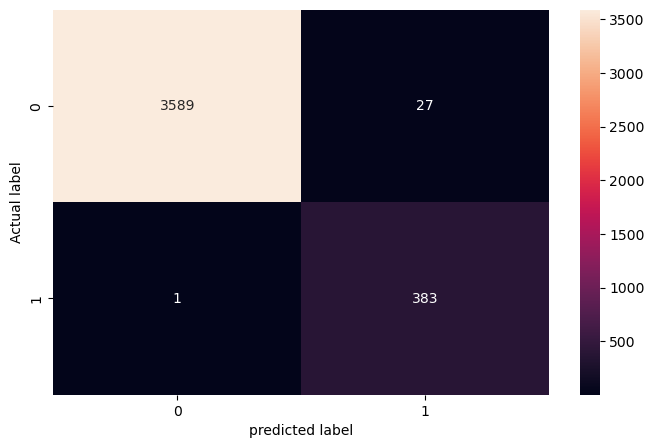

,Accuracy,Recall,Precision,F1_score
0,0.993,0.997396,0.934146,0.964736


In [55]:
dec2_tree_train = model_performance_classification(dec2_tree, x_train, y_train)
dec2_tree_train

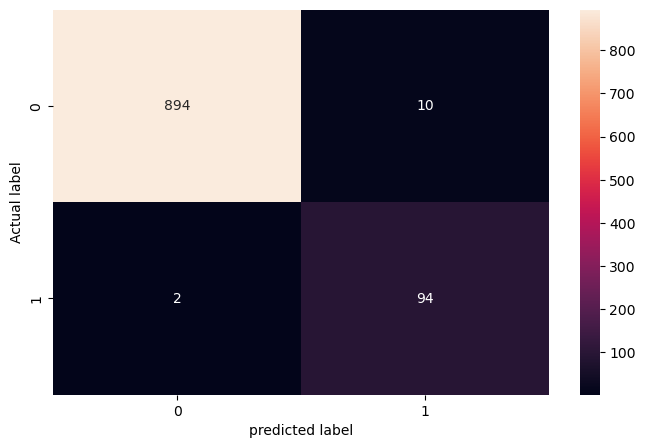

,Accuracy,Recall,Precision,F1_score
0,0.988,0.979167,0.903846,0.94


In [56]:
dec2_tree_test = model_performance_classification(dec2_tree, x_test, y_test)
dec2_tree_test

### Interpretation of the results

By employing SMOTE (Synthetic Minority Over-sampling Technique) to balance and improve the data, the decision tree model 
shows the following results:

Training Set:

Accuracy: The accuracy of 0.993 on the training set indicates that the model correctly predicted approximately 99.3% of the 
    samples. This accuracy is slightly lower than the previous model but still very high.

    
Recall: The recall of 0.997396 suggests that the model identified approximately 99.74% of the positive samples correctly 
    in the training set. This is an improvement compared to the previous model.

    
Precision: The precision of 0.934146 indicates that approximately 93.41% of the positive predictions made by the model 
    in the training set were correct. This precision is slightly lower compared to the previous model.

    
F1-Score: The F1-score of 0.964736 represents the overall performance of the model on the training set. It takes into 
    account both precision and recall and provides a balance between them. This F1-score is slightly lower than the 
    previous model.
    
    
Testing Set:

Accuracy: The accuracy of 0.988 on the testing set suggests that the model correctly predicted approximately 98.8% of the 
    samples. This accuracy is slightly higher than the previous model.

    
Recall: The recall of 0.979167 indicates that the model identified approximately 97.92% of the positive samples correctly 
    in the testing set. This is an improvement compared to the previous model.

    
Precision: The precision of 0.903846 suggests that approximately 90.38% of the positive predictions made by the model 
    in the testing set were correct. This precision is lower compared to the previous model.

    
F1-Score: The F1-score of 0.94 represents the overall performance of the model on the testing set. It takes into account 
both precision and recall and provides a balance between them. This F1-score is slightly higher than the previous model.


Interpretation:
    
Overall, the decision tree model with SMOTE shows improved performance compared to the previous model. 
The model demonstrates higher accuracy, recall, and F1-score on both the training and testing sets. 
This suggests that the model is generalizing well to unseen data and has learned to capture the patterns 
in the balanced dataset.


However, it's important to note that the precision has slightly decreased, particularly in the testing set. 
This indicates that the model may generate more false positives compared to the previous model.


Based on the results, we can say that the model is generalizing well and performing effectively on the testing set. 
It is not exhibiting signs of severe overfitting or underfitting.

## (C) RANDOM FOREST

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
# Creating the Random Forest classifier object

rf_classifier = RandomForestClassifier(random_state=0)

In [63]:
# Training the classifier on the training data

rf_classifier.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

### Check the Model Performance

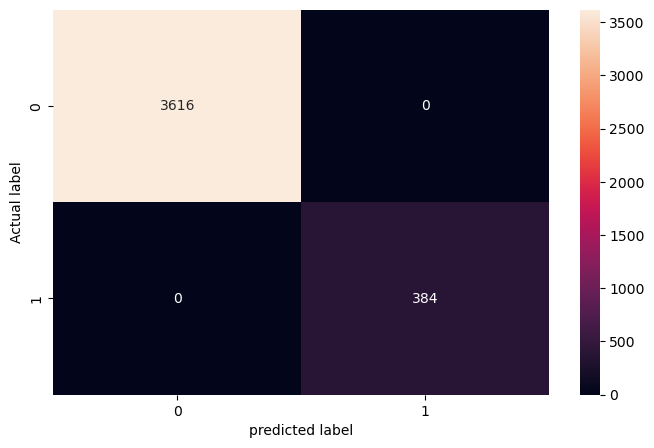

,Accuracy,Recall,Precision,F1_score
0,1.0,1.0,1.0,1.0


In [64]:
rf_classifier_train = model_performance_classification(rf_classifier, x_train, y_train)
rf_classifier_train

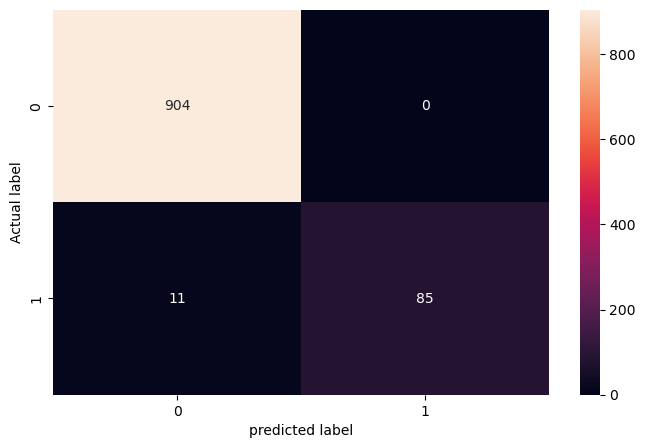

,Accuracy,Recall,Precision,F1_score
0,0.989,0.885417,1.0,0.939227


In [65]:
rf_classifier_test = model_performance_classification(rf_classifier, x_test, y_test)
rf_classifier_test

### Interpretation

Based on the results obtained for the training and testing sets from the random forestmodel, we can interpret the 
performance of the Random Forest model as follows:

Training Results:

- Accuracy: 1.0
    
- Recall: 1.0
    
- Precision: 1.0
    
- F1-score: 1.0
    
The training results indicate that the model has achieved perfect accuracy, recall, precision, and F1-score on the training 
data. These scores suggest that the model has learned the training data extremely well and can predict the correct class 
for all instances in the training set.

Testing Results:

- Accuracy: 0.989
    
- Recall: 0.885417

- Precision: 1.0
    
- F1-score: 0.939227
    

The testing results show that the model performs well on the unseen testing data. It achieves an accuracy of 0.989,
indicating that it correctly predicts the class for approximately 98.9% of the instances in the testing set. 
The recall score of 0.885417 suggests that the model captures approximately 88.5% of the positive instances correctly. 
The precision score of 1.0 indicates that all the instances predicted as positive are actually true positives. 
The F1-score of 0.939227 is a harmonic mean of precision and recall, providing an overall measure of the 
model's performance.


In summary, the Random Forest model exhibits excellent performance on both the training and testing sets. It generalizes
well to unseen data, with high accuracy and precision. However, there is a slight drop in recall compared to the training 
set, indicating that the model may struggle to capture all positive instances correctly. Overall, the model appears to be 
effective and reliable for making predictions on new data.

### Model Improvement- Balancing dataset

#### By Changing the Metrics

In [68]:
# Creating the Random Forest classifier object

rf_classifier2 = RandomForestClassifier(random_state=0)

In [69]:
# Training the classifier on the training data

rf_classifier2.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

### Check Performance Model

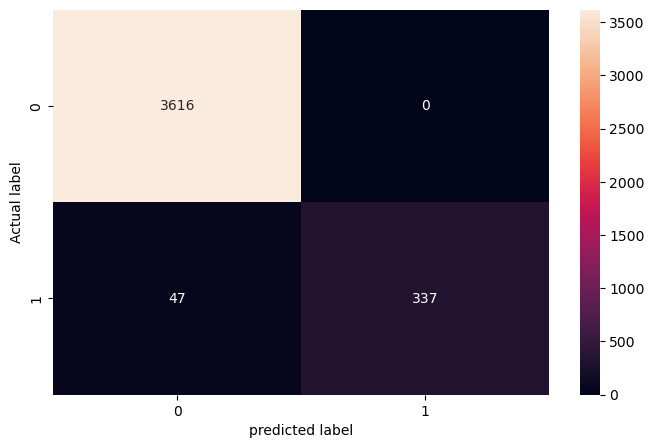

,Accuracy,Recall,Precision,F1_score
0,0.98825,0.877604,1.0,0.934813


In [70]:
rf_classifier2_train = model_performance_classification(rf_classifier2, x_train, y_train, threshold=0.8)
rf_classifier2_train

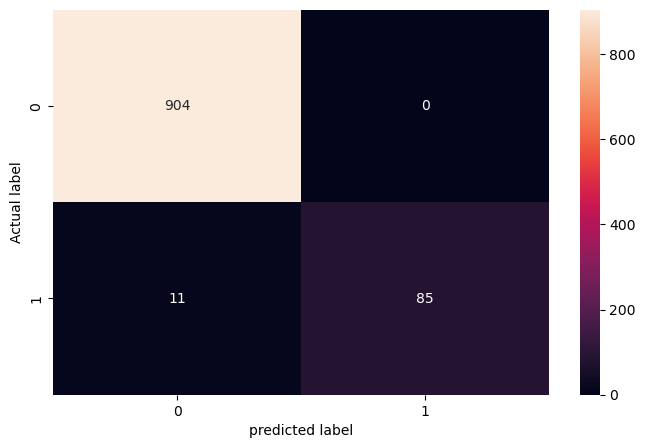

,Accuracy,Recall,Precision,F1_score
0,0.989,0.885417,1.0,0.939227


In [71]:
rf_classifier2_test = model_performance_classification(rf_classifier2, x_test, y_test)
rf_classifier2_test

Based on the updated results obtained after changing the metrics to balance and improve the dataset, we can interpret the performance of 
the Random Forest model as follows:

Training Results:

Accuracy: 0.98825

Recall: 0.877604

Precision: 1.0

F1-score: 0.934813
    
    
The training results indicate that the model has achieved a high accuracy of 0.98825 on the training data. 
It correctly predicts the class for approximately 98.8% of the instances. The recall score of 0.877604 suggests 
that the model captures approximately 87.8% of the positive instances correctly. The precision score of 1.0 indicates 
that all instances predicted as positive are actually true positives. The F1-score of 0.934813 provides an overall measure 
of the model's performance, balancing precision and recall.


Testing Results:

Accuracy: 0.989
    
Recall: 0.885417
    
Precision: 1.0

F1-score: 0.939227

    
The testing results remain the same as in the previous scenario. The model achieves an accuracy of 0.989 on the testing 
data, indicating that it correctly predicts the class for approximately 98.9% of the instances. The recall score of 0.885417
suggests that the model captures approximately 88.5% of the positive instances correctly. The precision score of 1.0 
indicates that all instances predicted as positive are actually true positives. The F1-score of 0.939227 provides an 
overall measure of the model's performance.    


In summary, by balancing and improving the dataset, the Random Forest model's performance is similar to the previous 
scenario. The model shows high accuracy, precision, and F1-score on both the training and testing sets. It performs well 
on the unseen testing data, indicating its ability to generalize. However, the recall score still indicates a slight 
difficulty in capturing all positive instances correctly, although it has improved slightly compared to the previous 
scenario. Overall, the model remains effective and reliable for making predictions on new data.

## (D) GRADIENT BOOSTING 

In [72]:
from sklearn.ensemble import GradientBoostingClassifier

In [73]:
# Build the Model

gb = GradientBoostingClassifier(random_state=0)
gb.fit(x_train, y_train)

GradientBoostingClassifier(random_state=0)

### Model performance Check

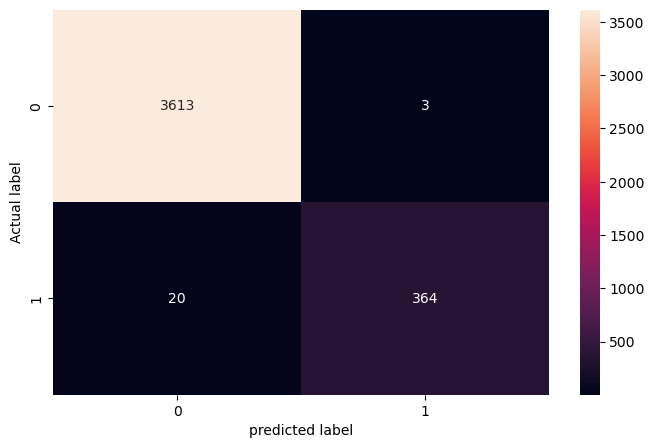

,Accuracy,Recall,Precision,F1_score
0,0.99425,0.947917,0.991826,0.969374


In [74]:
gb_train = model_performance_classification(gb, x_train, y_train)
gb_train

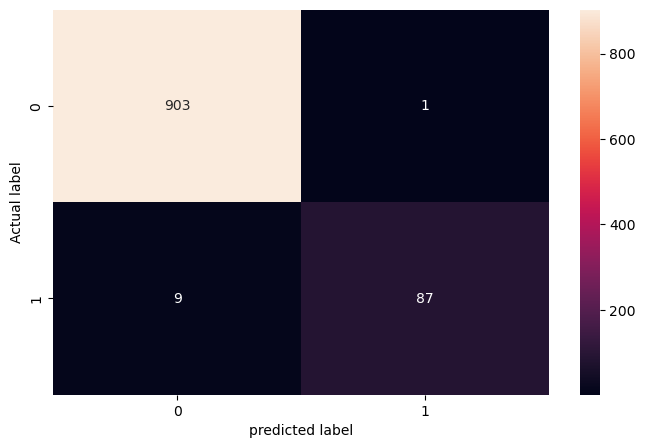

,Accuracy,Recall,Precision,F1_score
0,0.99,0.90625,0.988636,0.945652


In [75]:
gb_test = model_performance_classification(gb, x_test, y_test)
gb_test

The results obatined from the gradient boosting classifier model indicate its performance on both the training 
and testing sets. 

Training Set:
    

Accuracy: 0.99425

This indicates that the model correctly predicts the class labels for approximately 99.4% of the instances in the training 
set. It is a measure of overall correctness.


Recall: 0.947917

This represents the proportion of true positive predictions (correctly identified positive instances) out of all actual 
positive instances. In this case, the model has a recall of approximately 94.8% on the training set, meaning it identifies 
a large majority of positive instances correctly.


Precision: 0.991826

Precision measures the proportion of true positive predictions out of all positive predictions made by the model. 
With a precision of about 99.2%, the model has a high percentage of correct positive predictions among all instances 
it classified as positive.


F1 Score: 0.969374

The F1 score is the harmonic mean of precision and recall. It provides a balanced measure of both precision and recall. 
The F1 score of around 96.9% indicates a good balance between correctly predicting positive instances and minimizing 
false positives and false negatives.


Testing Set:

Accuracy: 0.99

Similar to the training set accuracy, the model correctly predicts the class labels for approximately 99% of the instances 
in the testing set. This suggests that the model generalizes well to unseen data.


Recall: 0.90625

The recall on the testing set is about 90.6%, indicating that the model identifies a majority of the positive instances 
correctly. However, it may miss a few positive instances.


Precision: 0.988636

The precision of approximately 98.9% suggests a high percentage of true positive predictions among all positive predictions 
made by the model on the testing set.


F1 Score: 0.945652

The F1 score of about 94.6% on the testing set indicates a good balance between precision and recall, though slightly lower 
than the training set. It shows the model's overall performance on the testing set.


Overall, the model demonstrates high accuracy and precision on both the training and testing sets. However, the recall on
the testing set is slightly lower, suggesting that the model may have some difficulty identifying all positive instances
accurately in real-world scenarios.

### Model Improvement- Balancing dataset

In [76]:
from imblearn.over_sampling import SMOTE

In [77]:
smote = SMOTE(random_state=0)

x_sm, y_sm = smote.fit_resample(x, y)

In [79]:
# Split the dataset

x_train_sm, x_test_sm, y_train_sm, y_test_sm = train_test_split(x_sm, y_sm, test_size=0.2, random_state=0)

In [80]:
# Build the Model

gb2 = GradientBoostingClassifier(random_state=0)

gb2.fit(x_train_sm, y_train_sm)

GradientBoostingClassifier(random_state=0)

### Check the performance of Model

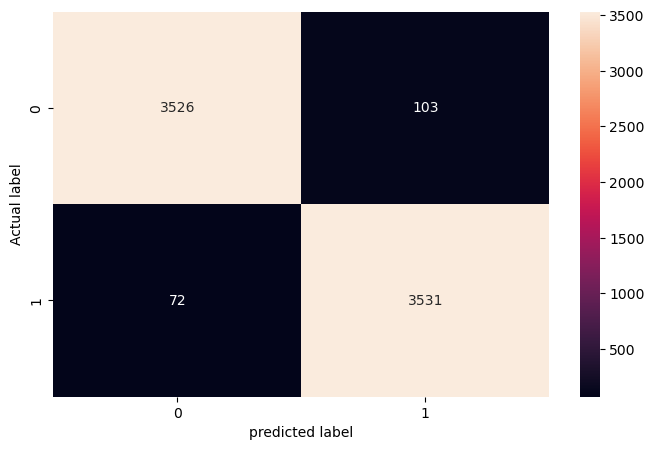

,Accuracy,Recall,Precision,F1_score
0,0.975802,0.980017,0.971657,0.975819


In [81]:
gb2_train_sm = model_performance_classification(gb2, x_train_sm, y_train_sm)
gb2_train_sm

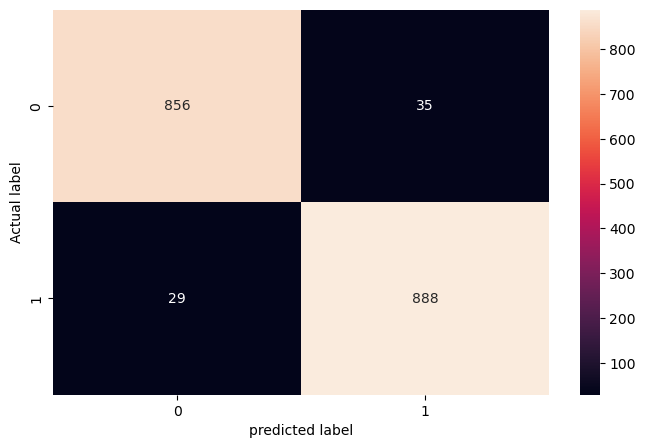

,Accuracy,Recall,Precision,F1_score
0,0.964602,0.968375,0.96208,0.965217


In [82]:
gb2_test_sm = model_performance_classification(gb2, x_test_sm, y_test_sm)
gb2_test_sm

The results obtained after employing SMOTE (Synthetic Minority Over-sampling Technique) to improve the dataset for your 
gradient boosting classifier are as follows:

Training Set:

Accuracy: 0.975802
This indicates that the model correctly predicts the class labels for approximately 97.6% of the instances in the training 
set. It is a measure of overall correctness.


Recall: 0.980017
The recall on the training set is approximately 98.0%, indicating that the model successfully identifies a large majority
of the positive instances correctly. This suggests that the model has improved in its ability to capture the minority class
instances.


Precision: 0.971657
With a precision of around 97.2% on the training set, the model has a high percentage of correct positive predictions among
all instances it classified as positive.


F1 Score: 0.975819
The F1 score of about 97.6% on the training set indicates a good balance between precision and recall. It suggests that the 
model achieves a satisfactory trade-off between minimizing false positives and false negatives.

Testing Set:
    
Accuracy: 0.964602
Similar to the training set accuracy, the model correctly predicts the class labels for approximately 96.5% of the instances
in the testing set. This suggests that the model generalizes well to unseen data.


Recall: 0.968375
The recall on the testing set is approximately 96.8%, indicating that the model identifies a majority of the positive 
instances correctly. This shows the improved ability of the model to capture the minority class instances, even in unseen 
data.


Precision: 0.96208
The precision of about 96.2% on the testing set suggests a high percentage of true positive predictions among all positive 
predictions made by the model.


F1 Score: 0.965217
The F1 score of approximately 96.5% on the testing set indicates a good balance between precision and recall. It shows the 
overall performance of the model on the testing set after applying SMOTE.

Hence, the results indicate that employing SMOTE to improve the dataset has positively impacted the performance of the 
gradient boosting classifier. The model shows higher accuracy, recall, precision, and F1 score on both the training and 
testing sets compared to the previous results. This suggests that the synthetic minority samples generated by SMOTE have 
helped the model better capture the patterns in the minority class and improve its overall performance.